# 1- Import Libs

In [1]:
import pandas as pd
import warnings
import numpy as np
import matplotlib.pyplot as plt
import mplcyberpunk
import seaborn as sns
import squarify
import country_converter as coco
import pycountry_convert as pc
from geopy.exc import GeocoderTimedOut
from geopy.geocoders import Nominatim
import folium
from folium.plugins import MarkerCluster
from folium import plugins
from folium.plugins import HeatMap
import requests
from io import BytesIO
plt.style.use("cyberpunk")
warnings.filterwarnings("ignore")

# 2- Loading Data

In [2]:
data=pd.read_csv('globalterrorismdb_0718dist.csv', low_memory=False,encoding="latin")
df=pd.DataFrame(data)
pd.set_option('display.max_columns', None)
df

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,location,summary,crit1,crit2,crit3,doubtterr,alternative,alternative_txt,multiple,success,suicide,attacktype1,attacktype1_txt,attacktype2,attacktype2_txt,attacktype3,attacktype3_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,natlty1,natlty1_txt,targtype2,targtype2_txt,targsubtype2,targsubtype2_txt,corp2,target2,natlty2,natlty2_txt,targtype3,targtype3_txt,targsubtype3,targsubtype3_txt,corp3,target3,natlty3,natlty3_txt,gname,gsubname,gname2,gsubname2,gname3,gsubname3,motive,guncertain1,guncertain2,guncertain3,individual,nperps,nperpcap,claimed,claimmode,claimmode_txt,claim2,claimmode2,claimmode2_txt,claim3,claimmode3,claimmode3_txt,compclaim,weaptype1,weaptype1_txt,weapsubtype1,weapsubtype1_txt,weaptype2,weaptype2_txt,weapsubtype2,weapsubtype2_txt,weaptype3,weaptype3_txt,weapsubtype3,weapsubtype3_txt,weaptype4,weaptype4_txt,weapsubtype4,weapsubtype4_txt,weapdetail,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,ishostkid,nhostkid,nhostkidus,nhours,ndays,divert,kidhijcountry,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,ransomnote,hostkidoutcome,hostkidoutcome_txt,nreleased,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,14,Private Citizens & Property,68.0,Named Civilian,NaN,Julio Guzman,58.0,Dominican Republic,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MANO-D,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,North America,Federal,Mexico city,19.371887,-99.086624,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,6,Hostage Taking (Kidnapping),NaN,NaN,NaN,NaN,7,Government (Diplomatic),45.0,"Diplomatic Personnel (outside of embassy, cons...",Belgian Ambassador Daughter,"Nadine Chaval, daughter",21.0,Belgium,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23rd of September Communist League,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,NaN,Mexico,1.0,800000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,4.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,10,Journalists & Media,54.0,Radio Journalist/Staff/Facility,Voice of America,Employee,217.0,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,Western Europe,Attica,Athens,37.997490,23.762728,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,3,Bombing/Explosion,NaN,NaN,NaN,NaN,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Embassy,217.0,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,Explosives,16.0,Unknown Explosive Type,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Explosive,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN

# 3- Data Processing

In [3]:
df=df.rename(columns={'iyear':'Year','imonth':'Month','iday':'Day','country_txt':'Country','region_txt':'Region',
                             'provstate':'State','city':'City','attacktype1_txt':'Attack_type','targtype1_txt':'Target_type',
                             'targsubtype1_txt':'Target_subtype','gname':'Gang_name','weaptype1_txt':'Weapon_type'})

In [4]:
df.head()

,eventid,Year,Month,Day,approxdate,extended,resolution,country,Country,region,Region,State,City,latitude,longitude,specificity,vicinity,location,summary,crit1,crit2,crit3,doubtterr,alternative,alternative_txt,multiple,success,suicide,attacktype1,Attack_type,attacktype2,attacktype2_txt,attacktype3,attacktype3_txt,targtype1,Target_type,targsubtype1,Target_subtype,corp1,target1,natlty1,natlty1_txt,targtype2,targtype2_txt,targsubtype2,targsubtype2_txt,corp2,target2,natlty2,natlty2_txt,targtype3,targtype3_txt,targsubtype3,targsubtype3_txt,corp3,target3,natlty3,natlty3_txt,Gang_name,gsubname,gname2,gsubname2,gname3,gsubname3,motive,guncertain1,guncertain2,guncertain3,individual,nperps,nperpcap,claimed,claimmode,claimmode_txt,claim2,claimmode2,claimmode2_txt,claim3,claimmode3,claimmode3_txt,compclaim,weaptype1,Weapon_type,weapsubtype1,weapsubtype1_txt,weaptype2,weaptype2_txt,weapsubtype2,weapsubtype2_txt,weaptype3,weaptype3_txt,weapsubtype3,weapsubtype3_txt,weaptype4,weaptype4_txt,weapsubtype4,weapsubtype4_txt,weapdetail,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,ishostkid,nhostkid,nhostkidus,nhours,ndays,divert,kidhijcountry,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,ransomnote,hostkidoutcome,hostkidoutcome_txt,nreleased,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,14,Private Citizens & Property,68.0,Named Civilian,NaN,Julio Guzman,58.0,Dominican Republic,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MANO-D,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,North America,Federal,Mexico city,19.371887,-99.086624,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,6,Hostage Taking (Kidnapping),NaN,NaN,NaN,NaN,7,Government (Diplomatic),45.0,"Diplomatic Personnel (outside of embassy, cons...",Belgian Ambassador Daughter,"Nadine Chaval, daughter",21.0,Belgium,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23rd of September Communist League,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,NaN,Mexico,1.0,800000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,4.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,10,Journalists & Media,54.0,Radio Journalist/Staff/Facility,Voice of America,Employee,217.0,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,Western Europe,Attica,Athens,37.997490,23.762728,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,3,Bombing/Explosion,NaN,NaN,NaN,NaN,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Embassy,217.0,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,Explosives,16.0,Unknown Explosive Type,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Explosive,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,0.0,NaN,

In [5]:
terrorism_df=df[['Year','Month','Day','Country','Region','State','City','Attack_type','Target_type','Target_subtype','Gang_name','Weapon_type']]
terrorism_df

,Year,Month,Day,Country,Region,State,City,Attack_type,Target_type,Target_subtype,Gang_name,Weapon_type
0,1970,7,2,Dominican Republic,Central America & Caribbean,NaN,Santo Domingo,Assassination,Private Citizens & Property,Named Civilian,MANO-D,Unknown
1,1970,0,0,Mexico,North America,Federal,Mexico city,Hostage Taking (Kidnapping),Government (Diplomatic),"Diplomatic Personnel (outside of embassy, cons...",23rd of September Communist League,Unknown
2,1970,1,0,Philippines,Southeast Asia,Tarlac,Unknown,Assassination,Journalists & Media,Radio Journalist/Staff/Facility,Unknown,Unknown
3,1970,1,0,Greece,Western Europe,Attica,Athens,Bombing/Explosion,Government (Diplomatic),Embassy/Consulate,Unknown,Explosives
4,1970,1,0,Japan,East Asia,Fukouka,Fukouka,Facility/Infrastructure Attack,Government (Diplomatic),Embassy/Consulate,Unknown,Incendiary
...,...,...,...,...,...,...,...,...,...,...,...,...
181686,2017,12,31,Somalia,Sub-Saharan Africa,Middle Shebelle,Ceelka Geelow,Armed Assault,Military,Military Checkpoint,Al-Shabaab,Firearms
181687,2017,12,31,Syria,Middle East & North Africa,Lattakia,Jableh,Bombing/Explosion,Military,Military Barracks/Base/Headquarters/Checkpost,Muslim extremists,Explosives
181688,2017,12,31,Philippines,Southeast Asia,Maguindanao,Kubentog,Facility/Infrastructure Attack,Private Citizens & Property,House/Apartment/Residence,Bangsamoro Islamic Freedom Movement (BIFM),Incendiary
181689,2017,12,31,India,South Asia,Manipur,Imphal,Bombing/Explosion,Government (General),Government Building/Facility/Office,Unknown,Explosives


In [6]:
terrorism_df['Target_subtype'] = terrorism_df['Target_subtype'].fillna('others')

In [7]:
terrorism_df['State']=terrorism_df['State'].fillna('Unknown')

In [8]:
terrorism_df['City']=terrorism_df['City'].fillna('Unknown')

In [9]:
terrorism_df.replace( {"Vehicle (not to include vehicle-borne explosives, i.e., car or truck bombs)": "Vehicle"},inplace = True)

In [10]:
terrorism_df

,Year,Month,Day,Country,Region,State,City,Attack_type,Target_type,Target_subtype,Gang_name,Weapon_type
0,1970,7,2,Dominican Republic,Central America & Caribbean,Unknown,Santo Domingo,Assassination,Private Citizens & Property,Named Civilian,MANO-D,Unknown
1,1970,0,0,Mexico,North America,Federal,Mexico city,Hostage Taking (Kidnapping),Government (Diplomatic),"Diplomatic Personnel (outside of embassy, cons...",23rd of September Communist League,Unknown
2,1970,1,0,Philippines,Southeast Asia,Tarlac,Unknown,Assassination,Journalists & Media,Radio Journalist/Staff/Facility,Unknown,Unknown
3,1970,1,0,Greece,Western Europe,Attica,Athens,Bombing/Explosion,Government (Diplomatic),Embassy/Consulate,Unknown,Explosives
4,1970,1,0,Japan,East Asia,Fukouka,Fukouka,Facility/Infrastructure Attack,Government (Diplomatic),Embassy/Consulate,Unknown,Incendiary
...,...,...,...,...,...,...,...,...,...,...,...,...
181686,2017,12,31,Somalia,Sub-Saharan Africa,Middle Shebelle,Ceelka Geelow,Armed Assault,Military,Military Checkpoint,Al-Shabaab,Firearms
181687,2017,12,31,Syria,Middle East & North Africa,Lattakia,Jableh,Bombing/Explosion,Military,Military Barracks/Base/Headquarters/Checkpost,Muslim extremists,Explosives
181688,2017,12,31,Philippines,Southeast Asia,Maguindanao,Kubentog,Facility/Infrastructure Attack,Private Citizens & Property,House/Apartment/Residence,Bangsamoro Islamic Freedom Movement (BIFM),Incendiary
181689,2017,12,31,India,South Asia,Manipur,Imphal,Bombing/Explosion,Government (General),Government Building/Facility/Office,Unknown,Explosives


In [11]:
#Check for null values.
terrorism_df.isnull().sum()

Year              0
Month             0
Day               0
Country           0
Region            0
State             0
City              0
Attack_type       0
Target_type       0
Target_subtype    0
Gang_name         0
Weapon_type       0
dtype: int64

# 4- Data Visualization

In [12]:
## Total_countries
Total_countries=terrorism_df['Country'].nunique()
print("Total %d countries were noted in the data"%Total_countries)

Total 205 countries were noted in the data


## 4.1 Top frequent country


In [13]:
frq_countries=pd.DataFrame(terrorism_df['Country'].value_counts()).head(10).reset_index()
frq_countries

,index,Country
0,Iraq,24636
1,Pakistan,14368
2,Afghanistan,12731
3,India,11960
4,Colombia,8306
5,Philippines,6908
6,Peru,6096
7,El Salvador,5320
8,United Kingdom,5235
9,Turkey,4292


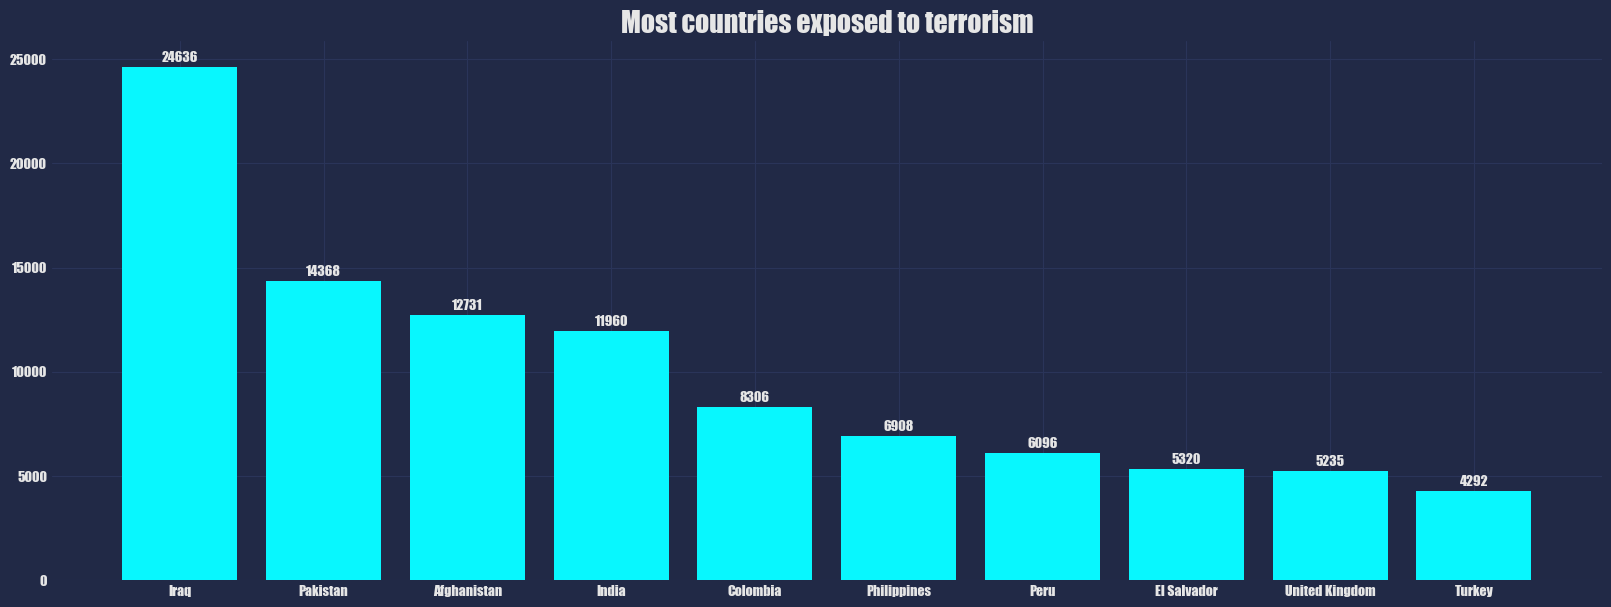

In [14]:
plt.rcParams["font.family"] = "impact"
fig, ax = plt.subplots( figsize=(20, 7))
bar=ax.bar(x=frq_countries['index'],height=frq_countries.Country,)
def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(bar)

plt.title("Most countries exposed to terrorism",size=20)

mplcyberpunk.add_glow_effects()


## 4.2 Top frequent gangs

In [15]:
# Top frequent gangs
frq_gangs=pd.DataFrame(terrorism_df['Gang_name'].value_counts()).head(11).reset_index()
frq_gangs

,index,Gang_name
0,Unknown,82782
1,Taliban,7478
2,Islamic State of Iraq and the Levant (ISIL),5613
3,Shining Path (SL),4555
4,Farabundo Marti National Liberation Front (FMLN),3351
5,Al-Shabaab,3288
6,New People's Army (NPA),2772
7,Irish Republican Army (IRA),2671
8,Revolutionary Armed Forces of Colombia (FARC),2487
9,Boko Haram,2418


In [16]:
frq_gangs.drop([0], axis=0, inplace=True)

In [17]:
frq_gangs

,index,Gang_name
1,Taliban,7478
2,Islamic State of Iraq and the Levant (ISIL),5613
3,Shining Path (SL),4555
4,Farabundo Marti National Liberation Front (FMLN),3351
5,Al-Shabaab,3288
6,New People's Army (NPA),2772
7,Irish Republican Army (IRA),2671
8,Revolutionary Armed Forces of Colombia (FARC),2487
9,Boko Haram,2418
10,Kurdistan Workers' Party (PKK),2310


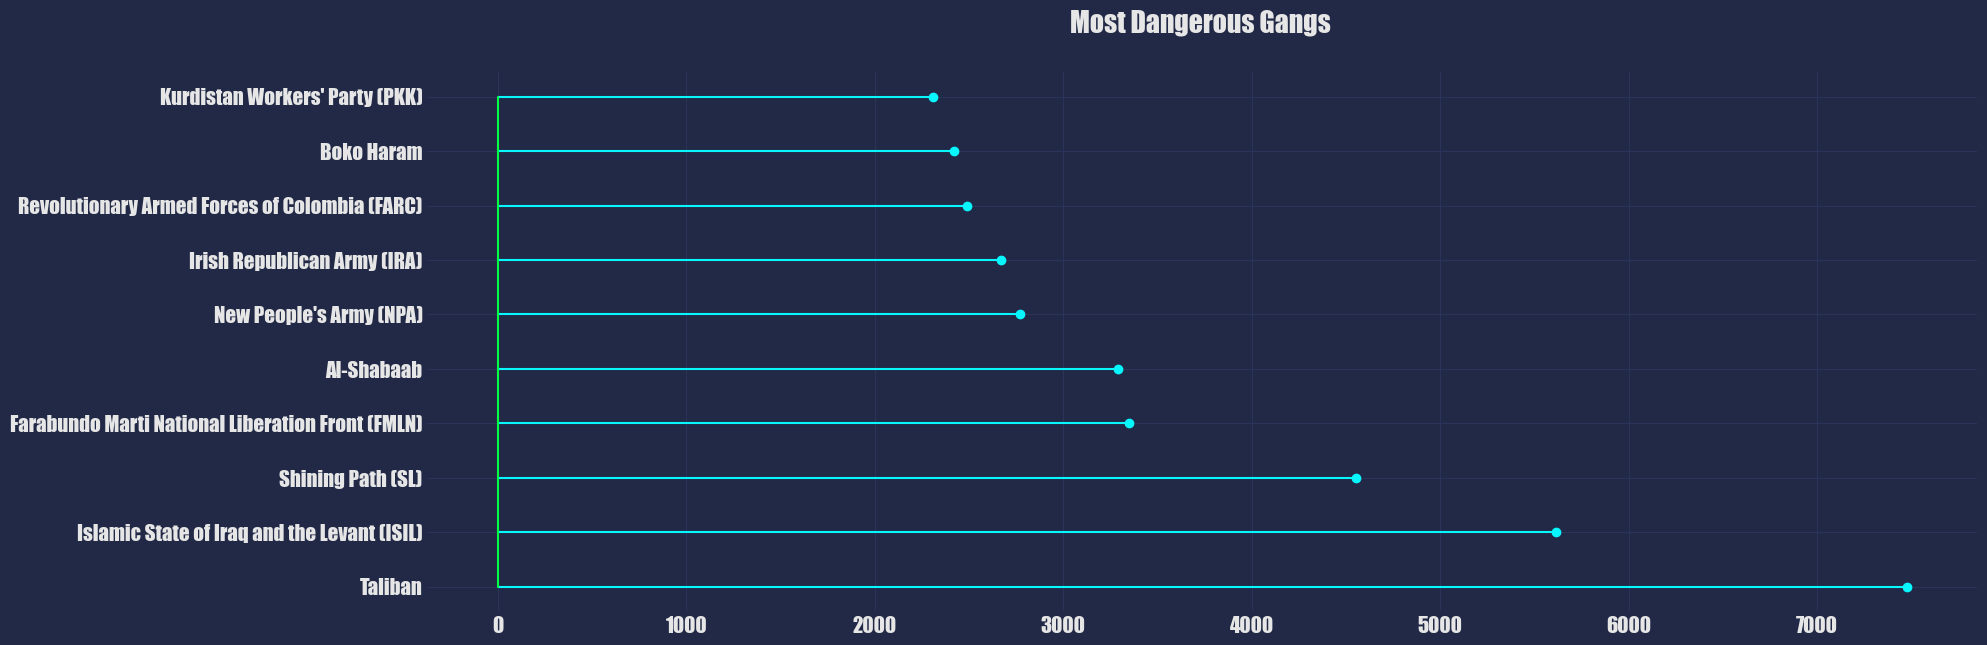

In [18]:
plt.rcParams["font.family"] = "impact"
plt.figure(figsize=(20, 7))
my_range=range(0,len(frq_gangs.index))
plt.title("Most Dangerous Gangs \n",size=20,color="#e6e6e6")
plt.stem(frq_gangs.Gang_name,orientation='horizontal')
plt.yticks( my_range, frq_gangs['index'],size=15)
plt.xticks(size=15)
plt.show()

## 4.3 Timeseries Vs Accidents

In [19]:
#years
y_accident=pd.DataFrame(terrorism_df.Year.value_counts()).reset_index().sort_values(by="index",ascending=False)
y_accident.columns=['Year','freq']
y_accident.head()

,Year,freq
4,2017,10900
2,2016,13587
1,2015,14965
0,2014,16903
3,2013,12036


In [20]:
#months
m_accident=pd.DataFrame(terrorism_df.Month.value_counts()).reset_index().sort_values(by="index",ascending=False)
m_accident.columns=['Month','freq']
m_accident.head()

,Month,freq
11,12,13496
8,11,14906
3,10,15563
9,9,14180
2,8,15800


In [21]:
#Day
d_accident=pd.DataFrame(terrorism_df.Day.value_counts()).reset_index().sort_values(by="index",ascending=False)
d_accident.columns=['Day','freq']
d_accident.head()

,Day,freq
30,31,3095
29,30,5046
28,29,5507
8,28,6027
14,27,5937


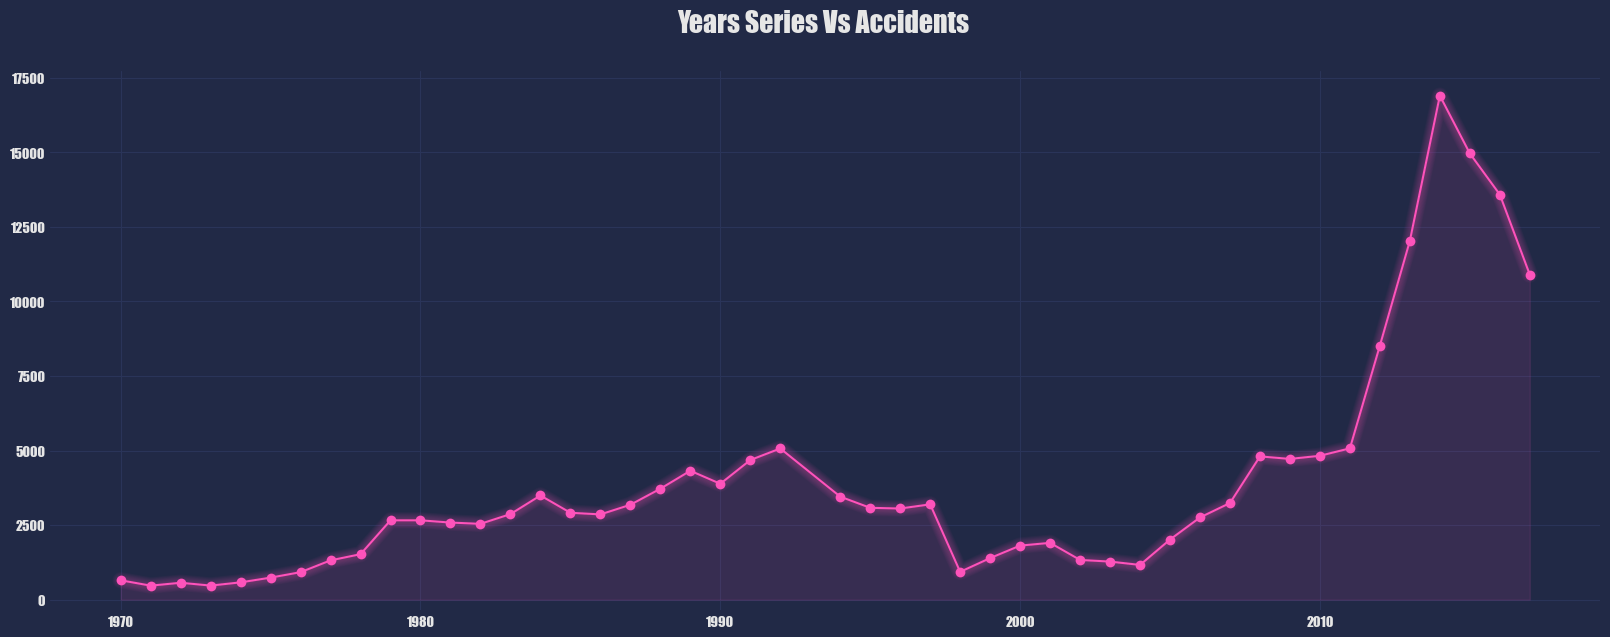

In [22]:
plt.figure(figsize=(20, 7))
plt.title("Years Series Vs Accidents \n",size=20,color="#e6e6e6")
plt.plot(y_accident.Year,y_accident.freq, marker='o',color="#fe53bb")
mplcyberpunk.add_glow_effects()

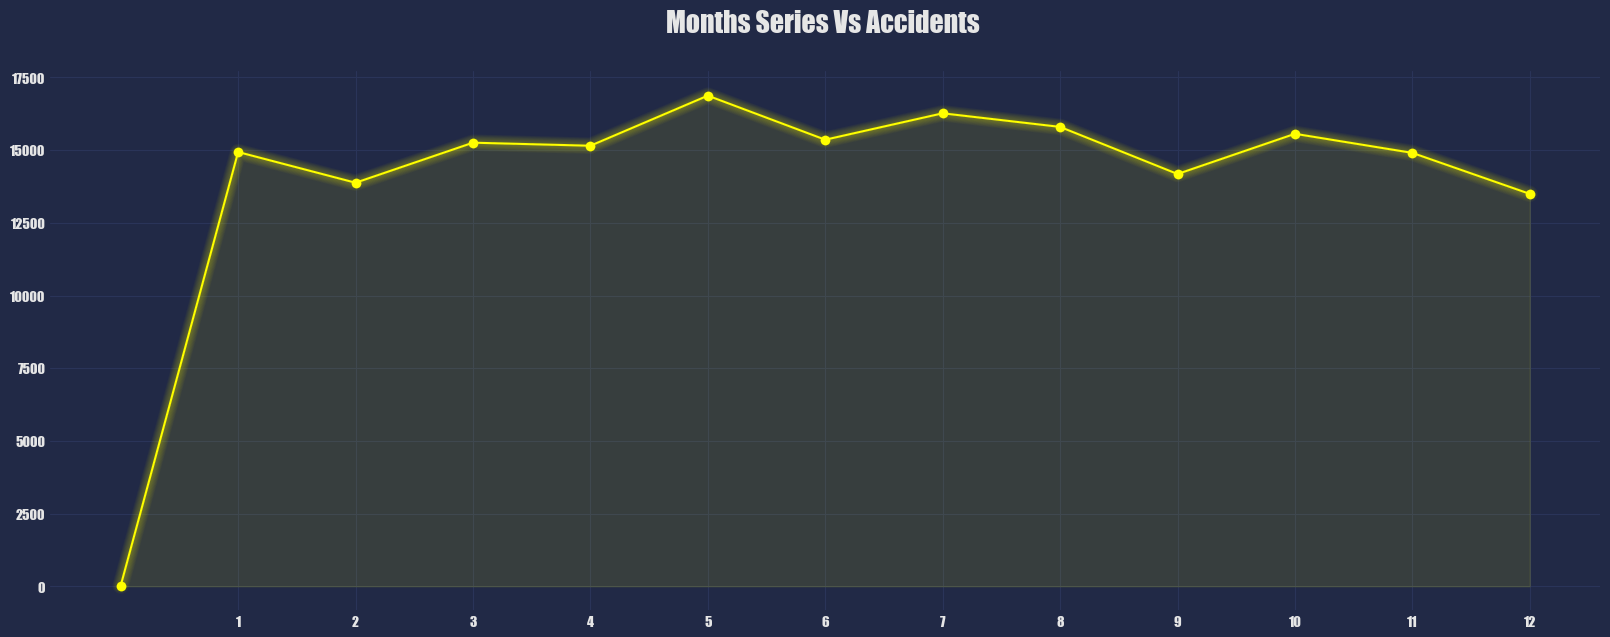

In [23]:
plt.figure(figsize=(20, 7))
plt.title("Months Series Vs Accidents \n",size=20,color="#e6e6e6")
plt.plot(m_accident.Month,m_accident.freq, marker='o',color="yellow")
plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12])
mplcyberpunk.add_glow_effects()

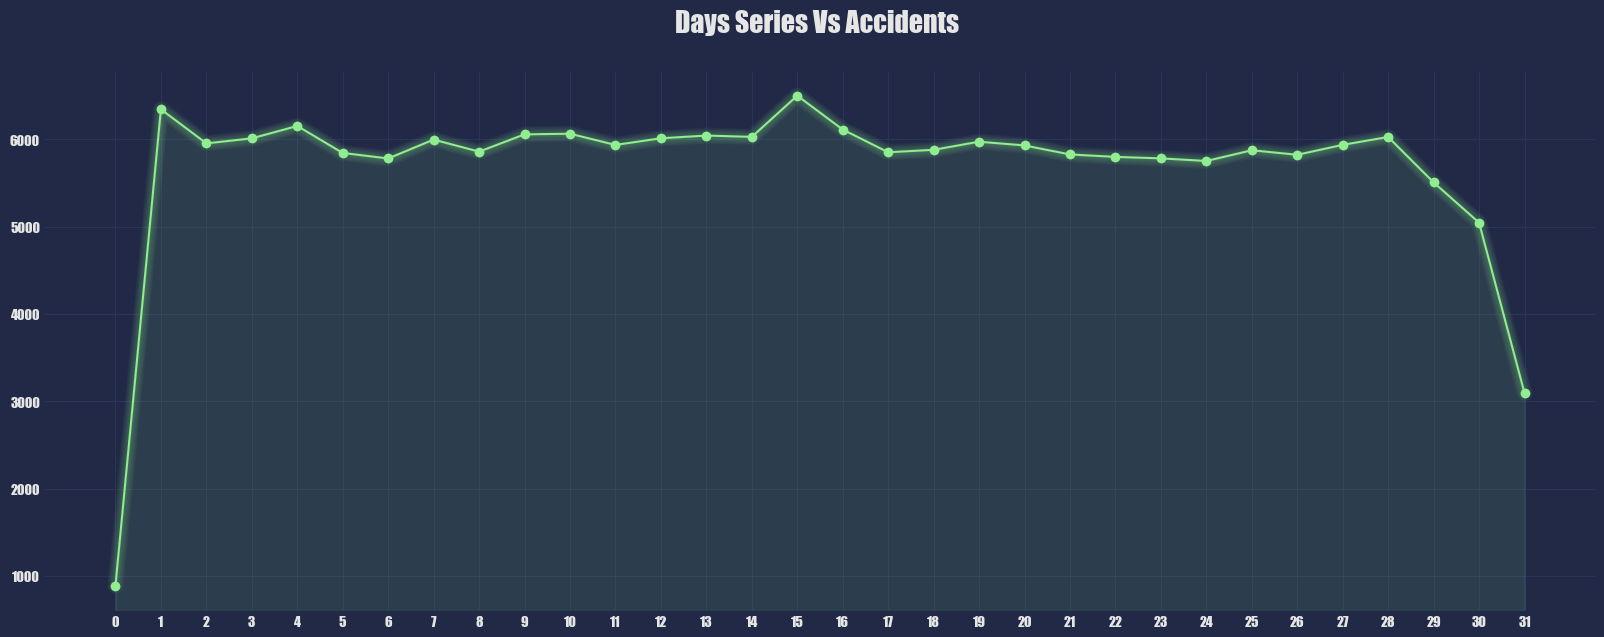

In [24]:
plt.figure(figsize=(20, 7))
plt.title("Days Series Vs Accidents \n",size=20,color="#e6e6e6")
plt.plot(d_accident.Day,d_accident.freq, marker='o',color="lightgreen")
plt.xticks(d_accident.Day)
mplcyberpunk.add_glow_effects()

## 4.4 Countries Vs Accidents

In [25]:
new_countries=pd.DataFrame(terrorism_df['Country'].value_counts()).reset_index()
new_countries.columns=["Country","Freq"]
new_countries

,Country,Freq
0,Iraq,24636
1,Pakistan,14368
2,Afghanistan,12731
3,India,11960
4,Colombia,8306
...,...,...
200,International,1
201,Wallis and Futuna,1
202,South Vietnam,1
203,Andorra,1


In [26]:
# CONVERT ISO COUNTRY TO CONTENENT
def country_to_continent(country_name):
    country_alpha2 = pc.country_name_to_country_alpha2(country_name)
    country_continent_code = pc.country_alpha2_to_continent_code(country_alpha2)
    country_continent_name = pc.convert_continent_code_to_continent_name(country_continent_code)
    return country_continent_name


# ------ MAIN -------
df = pd.DataFrame()
df['Country']=new_countries.Country

# CONVERT COUNTRY TO ISO COUNTRY
cc = coco.CountryConverter()

# Create a list of country names for the dataframe
cont_list=[]
for arow in df['Country']:
    country = []
    arowarr = arow.split(", ")
    for aname in arowarr:
        country.append(aname)

    #print(f'org:{arow} split:{country}')
    # Converting country names to ISO 3    
    iso_alpha = cc.convert(names = country, to='ISO3')
    #print(f'iso_alpha:{iso_alpha} type:{type(iso_alpha)}')

    # converting to contenents
    contenent=[]
    if (type(iso_alpha) == type("")):
        try:
            #print(f'   iso_alpha:{iso_alpha}')
            contenent.append(country_to_continent(iso_alpha))
        except:
            contenent.append('other')
    else:
        for iso in iso_alpha:
            try:
                #print(f'   iso:{iso}')
                contenent.append(country_to_continent(iso))
            except:
                contenent.append('other')

    # convert array back to string
    str_cont = ', '.join(contenent)
    #print(f'str_cont:{str_cont}')
    cont_list.append(str_cont)

# add contenents to original dataframe
df['Contenent']=cont_list


West Germany (FRG) not found in regex
Yugoslavia not found in regex
Soviet Union not found in regex
East Germany (GDR) not found in regex
Serbia-Montenegro not found in regex
People's Republic of the Congo not found in regex
International not found in regex
South Vietnam not found in regex


In [27]:
World_df=new_countries.merge(df, how='inner')
World_df

,Country,Freq,Contenent
0,Iraq,24636,Asia
1,Pakistan,14368,Asia
2,Afghanistan,12731,Asia
3,India,11960,Asia
4,Colombia,8306,South America
...,...,...,...
200,International,1,other
201,Wallis and Futuna,1,Oceania
202,South Vietnam,1,other
203,Andorra,1,Europe


In [28]:
total_acc_World=pd.DataFrame(World_df.groupby('Contenent')['Freq'].sum()).reset_index().drop(6).sort_values(by="Freq",ascending=False)
total_acc_World

,Contenent,Freq
1,Asia,101795
0,Africa,25164
2,Europe,20583
5,South America,18978
3,North America,13800
4,Oceania,282


In [29]:
# declare an empty list to store
# latitude and longitude of values 
# of city column
longitude = []
latitude = []
   
# function to find the coordinate
# of a given city 
def findGeocode(city):
       
    # try and catch is used to overcome
    # the exception thrown by geolocator
    # using geocodertimedout  
    try:
          
        # Specify the user_agent as your
        # app name it should not be none
        geolocator = Nominatim(user_agent="your_app_name")
          
        return geolocator.geocode(city)
      
    except GeocoderTimedOut:
          
        return findGeocode(city)    
  
# each value from city column
# will be fetched and sent to
# function find_geocode   
for i in (total_acc_World["Contenent"]):
      
    if findGeocode(i) != None:
           
        loc = findGeocode(i)
          
        # coordinates returned from 
        # function is stored into
        # two separate list
        latitude.append(loc.latitude)
        longitude.append(loc.longitude)
       
    # if coordinate for a city not
    # found, insert "NaN" indicating 
    # missing value 
    else:
        latitude.append(np.nan)
        longitude.append(np.nan)

In [30]:
total_acc_World["Longitude"] = longitude
total_acc_World["Latitude"] = latitude

In [31]:
total_acc_World

,Contenent,Freq,Longitude,Latitude
1,Asia,101795,89.234375,51.208697
0,Africa,25164,17.757812,11.502434
2,Europe,20583,10.000000,51.000000
5,South America,18978,-61.000656,-21.000218
3,North America,13800,-109.000000,51.000000
4,Oceania,282,173.774169,-12.772583


In [32]:
#empty map
world_map= folium.Map(tiles="cartodbpositron")
marker_cluster = MarkerCluster().add_to(world_map)
#for each coordinate, create circlemarker of user percent
for i in range(len(total_acc_World)):
        lat = total_acc_World.iloc[i]['Latitude']
        long = total_acc_World.iloc[i]['Longitude']
        radius=15,
        popup_text = """Contenent : {}<br>
                    Total Accidents : {}<br>"""
        popup_text = popup_text.format(total_acc_World.iloc[i]['Contenent'],
                                   total_acc_World.iloc[i]['Freq']
                                   )
        folium.CircleMarker(location = [lat, long], radius=radius, popup= popup_text, fill =True).add_to(marker_cluster)
#show the map
world_map

## 4.5 Weapon_type counts

In [33]:
weapon_countries=pd.DataFrame(terrorism_df.Weapon_type.value_counts()).head(5).reset_index()
weapon_countries

,index,Weapon_type
0,Explosives,92426
1,Firearms,58524
2,Unknown,15157
3,Incendiary,11135
4,Melee,3655


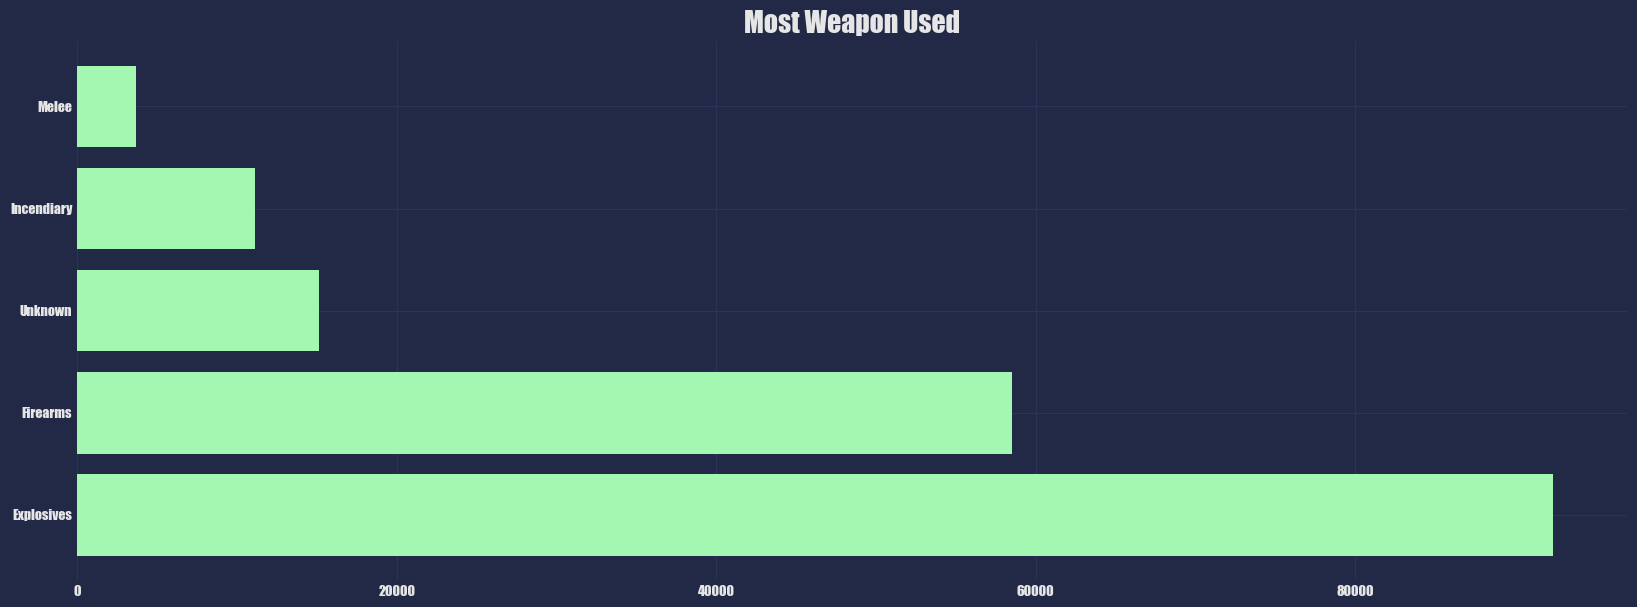

In [50]:
plt.rcParams["font.family"] = "impact"

fig, ax = plt.subplots( figsize=(20, 7))
barh=ax.barh(weapon_countries['index'],weapon_countries['Weapon_type'],color='#a4f7b0')
plt.title("Most Weapon Used",size=20)
mplcyberpunk.add_glow_effects()

## 4.6 Focus on Egypt

In [54]:
Egypt_terr=terrorism_df.loc[terrorism_df.Country == "Egypt"].reset_index().drop("index",axis=1)
Egypt_terr

,Year,Month,Day,Country,Region,State,City,Attack_type,Target_type,Target_subtype,Gang_name,Weapon_type
0,1970,3,14,Egypt,Middle East & North Africa,Alexandria,Alexandria,Bombing/Explosion,Airports & Aircraft,Aircraft (not at an airport),Unknown,Explosives
1,1971,11,28,Egypt,Middle East & North Africa,Cairo,Cairo,Assassination,Government (General),Head of State,Black September,Firearms
2,1972,2,19,Egypt,Middle East & North Africa,Cairo,Cairo,Hijacking,Airports & Aircraft,Aircraft (not at an airport),Jordanian National Liberation Movement,Explosives
3,1977,12,5,Egypt,Middle East & North Africa,Cairo,Cairo,Assassination,Journalists & Media,Newspaper Journalist/Staff/Facility,Unknown,Firearms
4,1978,9,30,Egypt,Middle East & North Africa,North Sinai,Yamit,Bombing/Explosion,Private Citizens & Property,"Public Area (garden, parking lot, garage, beac...",Palestinians,Explosives
...,...,...,...,...,...,...,...,...,...,...,...,...
2474,2017,12,28,Egypt,Middle East & North Africa,North Sinai,Beir al-Abd,Bombing/Explosion,Military,Military Unit/Patrol/Convoy,Sinai Province of the Islamic State,Explosives
2475,2017,12,28,Egypt,Middle East & North Africa,North Sinai,Arish,Armed Assault,Police,Police Security Forces/Officers,Sinai Province of the Islamic State,Explosives
2476,2017,12,28,Egypt,Middle East & North Africa,North Sinai,Gifgafa,Bombing/Explosion,Military,"Military Personnel (soldiers, troops, officers...",Unknown,Explosives
2477,2017,12,29,Egypt,Middle East & North Africa,Cairo,Helwan,Bombing/Explosion,Religious Figures/Institutions,Place of Worship,Islamic State in Egypt,Explosives


### 4.6.1 Most target states

<AxesSubplot:title={'center':'Most target states (EGY) '}>

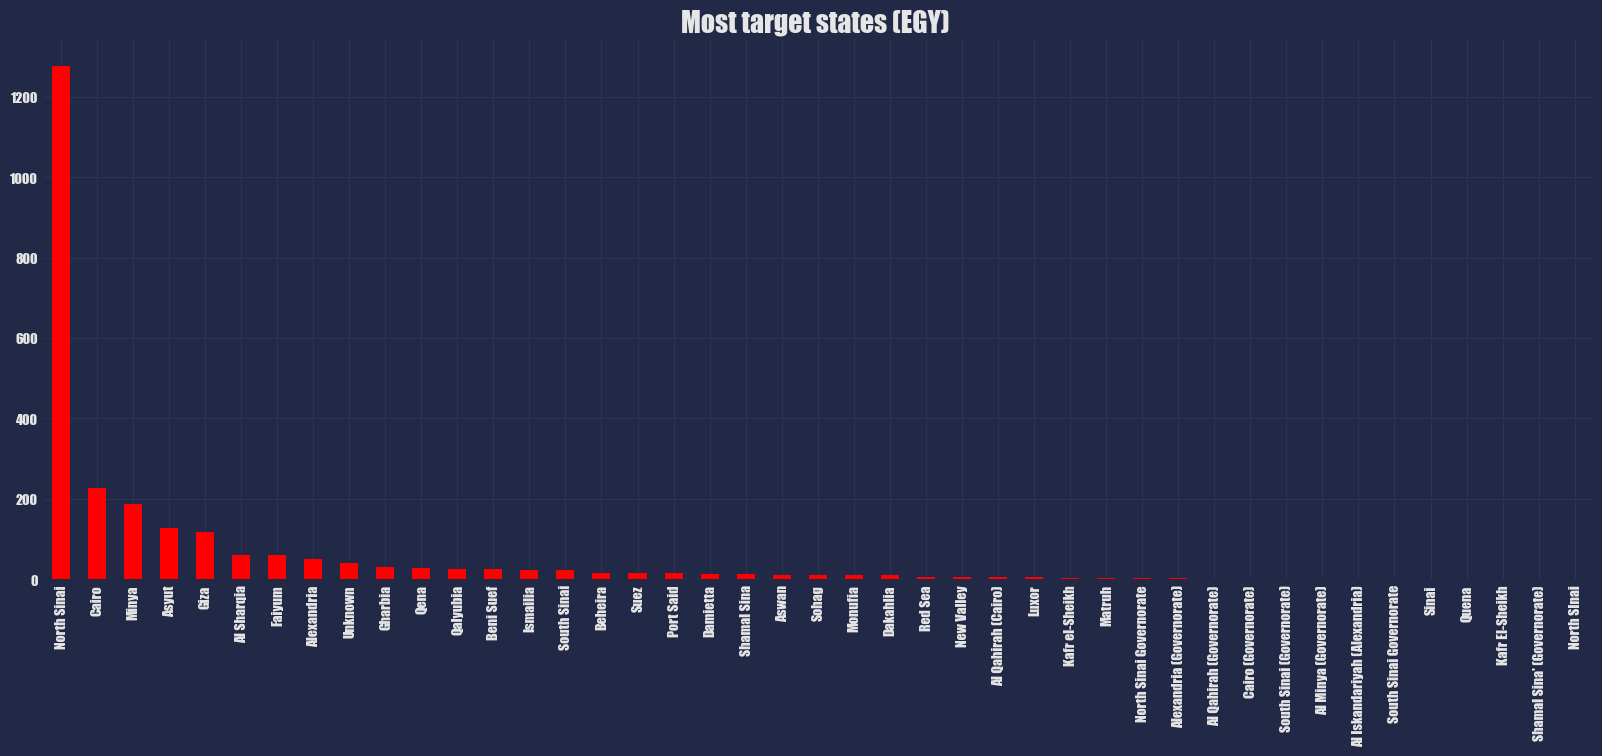

In [78]:
plt.figure(figsize=(20, 7))
plt.title("Most target states (EGY) ",size=20)

Egypt_terr.State.value_counts().plot.bar(color="red")

### 4.6.2 Most target Type

<AxesSubplot:title={'center':'Most target Type (EGY) '}>

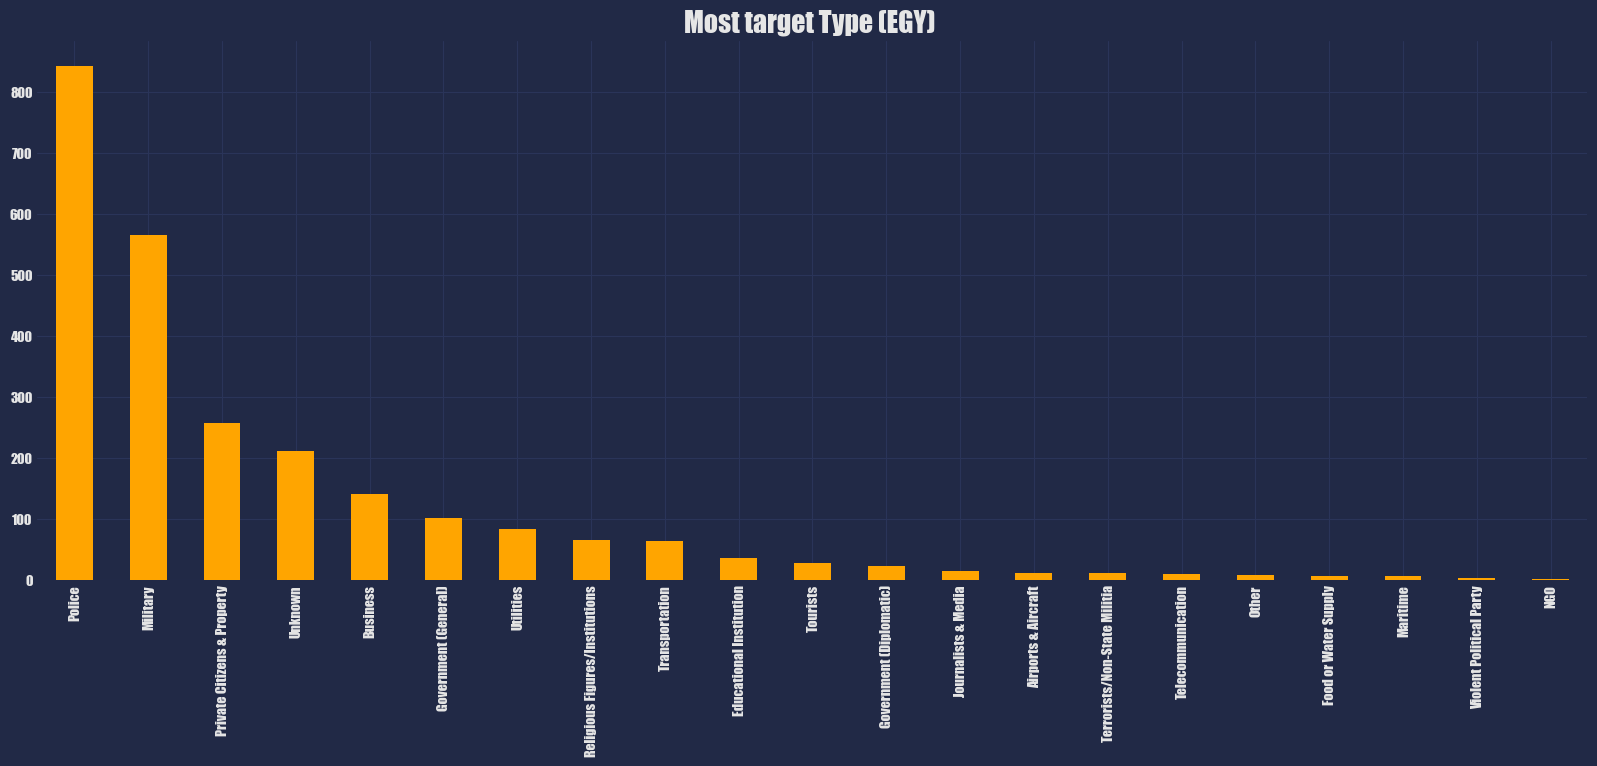

In [79]:
plt.figure(figsize=(20, 7))
plt.title("Most target Type (EGY) ",size=20)
Egypt_terr.Target_type.value_counts().plot.bar(color="orange")

In [75]:
egy_accident=pd.DataFrame(Egypt_terr.Year.value_counts()).reset_index().sort_values(by="index",ascending=False)
egy_accident.columns=['Year','freq']
egy_accident.head()

,Year,freq
4,2017,224
1,2016,376
0,2015,647
2,2014,354
3,2013,321


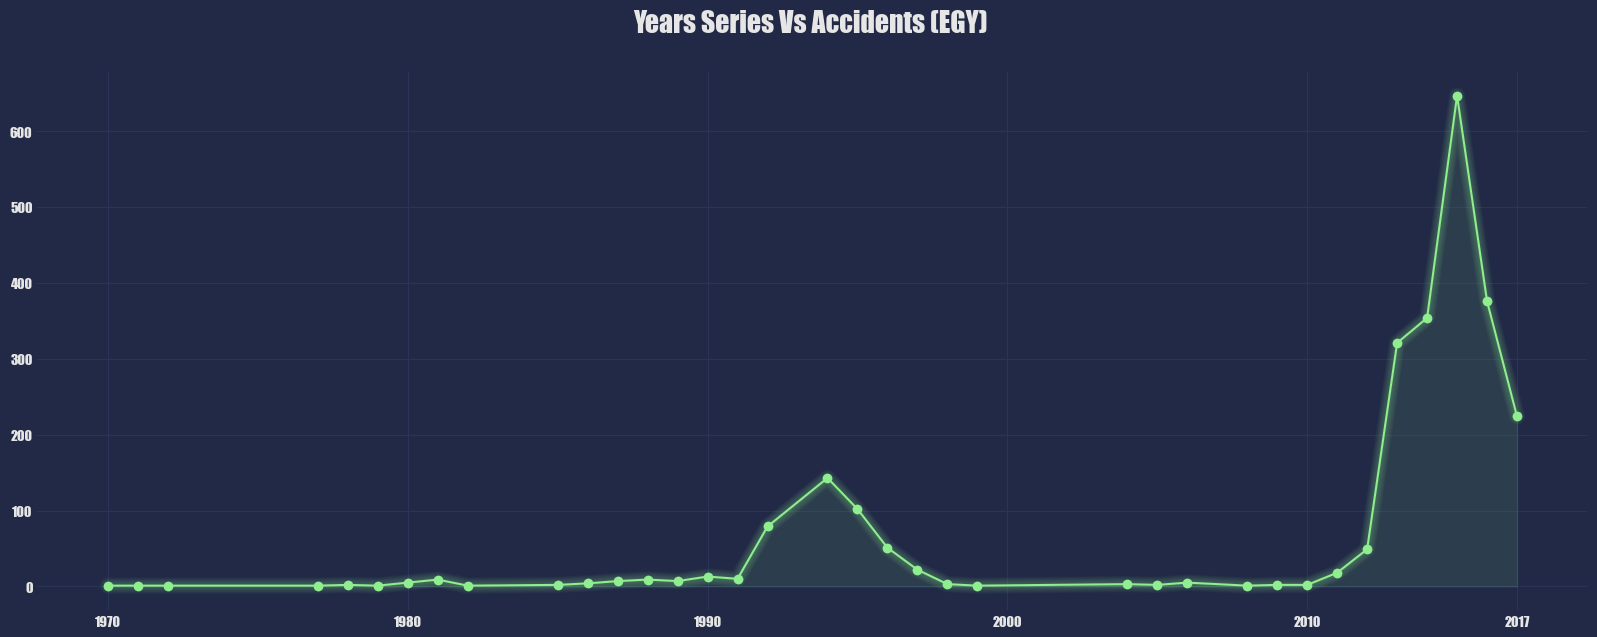

In [85]:
plt.figure(figsize=(20, 7))
plt.title("Years Series Vs Accidents (EGY) \n",size=20,color="#e6e6e6")
plt.plot(egy_accident.Year,egy_accident.freq, marker='o',color="lightgreen")
plt.xticks([1970,1980,1990,2000,2010,2017])
mplcyberpunk.add_glow_effects()